In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Đọc dữ liệu từ file Excel
file_path = 'FORECASTING BUSINESS PERFORMANCE.xlsx'
sales_fact = pd.read_excel(file_path, sheet_name='SalesFact')
product = pd.read_excel(file_path, sheet_name='Product')
geography = pd.read_excel(file_path, sheet_name='Geography')

# Kiểm tra thông tin cột
print("SalesFact columns:", sales_fact.columns)
print("Product columns:", product.columns)
print("Geography columns:", geography.columns)

# Join SalesFact với Product qua ProductID
df_temp = sales_fact.merge(product, on='ProductID', how='left')
print("After merging SalesFact with Product:", df_temp.shape)

# Join tiếp với Geography qua Zip
dfi = df_temp.merge(geography, on='Zip', how='left')
print("After merging with Geography:", dfi.shape)

# Hiển thị thông tin của bảng cuối cùng
dfi.info()
dfi.head()


SalesFact columns: Index(['ProductID', 'Date', 'Zip', 'Units', 'Revenue', 'COGS'], dtype='object')
Product columns: Index(['Category', 'Segment', 'Product', 'ProductID'], dtype='object')
Geography columns: Index(['Zip', 'City', 'State', 'Region', 'District'], dtype='object')
After merging SalesFact with Product: (976243, 9)
After merging with Geography: (976243, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976243 entries, 0 to 976242
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  976243 non-null  int64         
 1   Date       976243 non-null  datetime64[ns]
 2   Zip        976243 non-null  int64         
 3   Units      976243 non-null  int64         
 4   Revenue    976202 non-null  float64       
 5   COGS       976243 non-null  float64       
 6   Category   976243 non-null  object        
 7   Segment    976243 non-null  object        
 8   Product    976243 non-null  object 

,ProductID,Date,Zip,Units,Revenue,COGS,Category,Segment,Product,City,State,Region,District
0,1228,2013-07-31,78773,12,19648.44,12309.747660,Urban,Convenience,Pirum UC-30,"Austin, TX",TX,Central,District #23
1,781,2014-03-12,90501,16,20351.52,13497.128064,Rural,Productivity,Natura RP-69,"Torrance, CA",CA,West,District #37
2,2090,2013-11-29,44460,26,111367.62,91488.499830,Urban,Convenience,Currus UC-25,"Salem, OH",OH,East,District #14
3,1116,2018-08-29,30122,12,36280.44,21967.806420,Rural,Select,Pirum RS-04,"Lithia Springs, GA",GA,East,District #09
4,993,2013-04-27,75789,14,55557.18,48645.866808,Urban,Convenience,Natura UC-56,"Troup, TX",TX,Central,District #24


In [4]:
df_nan = dfi[dfi.isna().any(axis=1)]
df_nan

,ProductID,Date,Zip,Units,Revenue,COGS,Category,Segment,Product,City,State,Region,District
319629,2197,2022-07-01,6379,1,NaN,0.0,Mix,All Season,Aliqui MA-11,"Pawcatuck, CT",CT,East,District #02
333052,2302,2022-06-17,89044,1,NaN,0.0,Urban,Regular,Aliqui UR-05,"Henderson, NV",NV,West,District #38
333126,2209,2022-06-25,92805,1,NaN,0.0,Rural,Productivity,Aliqui RP-06,"Anaheim, CA",CA,West,District #37
333237,912,2022-06-07,68521,1,NaN,0.0,Urban,Extreme,Natura UE-21,"Lincoln, NE",NE,Central,District #30
333337,2302,2022-07-01,98629,1,NaN,0.0,Urban,Regular,Aliqui UR-05,"La Center, WA",WA,West,District #34
333533,1542,2022-06-17,92086,1,NaN,0.0,Rural,Productivity,Quibus RP-34,"Warner Springs, CA",CA,West,District #38
333543,2302,2022-06-29,34758,1,NaN,0.0,Urban,Regular,Aliqui UR-05,"Kissimmee, FL",FL,East,District #12
333545,919,2022-06-28,94085,1,NaN,0.0,Urban,Extreme,Natura UE-28,"Sunnyvale, CA",CA,West,District #36
333731,1835,2022-06-26,60608,1,NaN,0.0,Youth,Youth,Pomum YY-30,"Chicago, IL",IL,Central,District #31
333890,2302,2022-06-28,80031,1,NaN,0.0,Urban,Regular,Aliqui UR-05,"Westminster, CO",CO,Central,District #20


Nhận thấy những giá trị bị NaN là do có giá vốn hàng bán (COGS) = 0, việc này có thể do đây là các hàng hoá được tặng kèm hoặc đồ dùng tặng nên ghi nhận COGS = 0, từ đó thì không ghi nhận doanh thu. Do đó, với những cột này nhóm thực hiện bỏ những cột này đi khi xử lí dữ liệu.

In [5]:
dfi = dfi.dropna(subset=['Revenue'])

Thêm một số chỉ số tài chính vào dataframe

In [6]:
# Thêm các chỉ số tài chính vào dataframe
dfi['Gross_Profit'] = dfi['Revenue'] - dfi['COGS']
dfi['Gross_Margin'] = (dfi['Gross_Profit'] / dfi['Revenue']) * 100  # %
dfi['Profitability_Index'] = dfi['Gross_Profit'] / dfi['COGS']
dfi['COGS_to_Revenue_Ratio'] = dfi['COGS'] / dfi['Revenue']
dfi['Cost_Control_Efficiency'] = (dfi['Revenue'] - dfi['COGS']) / dfi['COGS']
dfi['ROS'] = dfi['Gross_Profit'] / dfi['Revenue']
dfi['Revenue_per_Unit'] = dfi['Revenue'] / dfi['Units']

## Trực quan hoá dữ liệu

In [25]:
# Tiền xử lý dữ liệu
dfi['Date'] = pd.to_datetime(dfi['Date'])  # Chuyển Date thành datetime
dfi['Year'] = dfi['Date'].dt.year  # Thêm cột năm
dfi['Month'] = dfi['Date'].dt.month  # Thêm cột tháng
dfi['Weekday'] = dfi['Date'].dt.day_name()  # Ngày trong tuần
dfi['Profit'] = dfi['Revenue'] - dfi['COGS']  # Lợi nhuận
dfi['Profit_Margin'] = dfi['Profit'] / dfi['Revenue']  # Biên lợi nhuận
dfi['ROS'] = dfi['Profit'] / dfi['Revenue']  # Return on Sales

# Thiết lập style
sns.set(style="whitegrid")



**Top 10 sản phẩm có doanh thu cao nhất**

/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


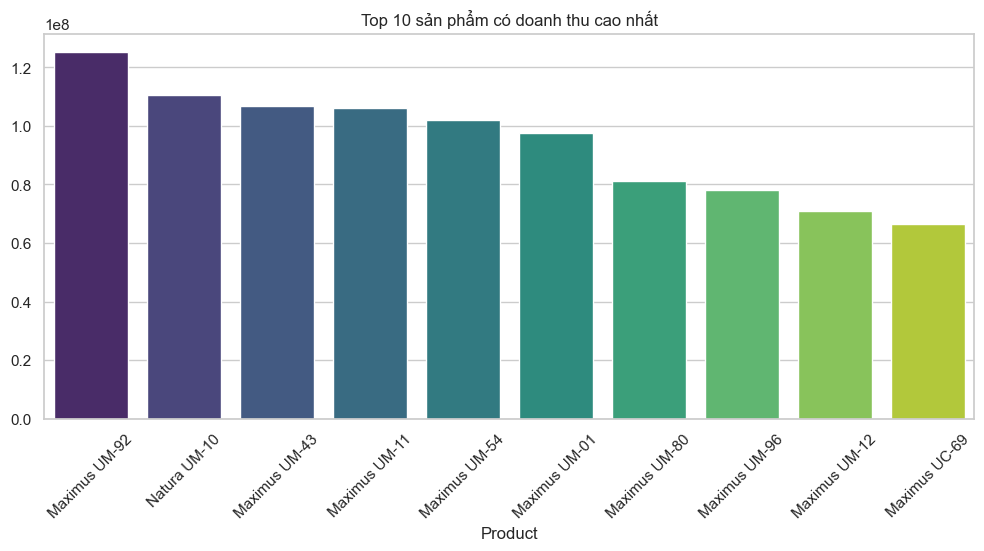

In [26]:
### Top 10 sản phẩm có doanh thu cao nhất ###
plt.figure(figsize=(12, 5))
top_products = dfi.groupby('Product')['Revenue'].sum().nlargest(10)
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 sản phẩm có doanh thu cao nhất")
plt.show()


Sản phẩm đang có doanh thu cao nhất là Maximus UM-92

**Phân tích lợi nhuận theo khu vực**

/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


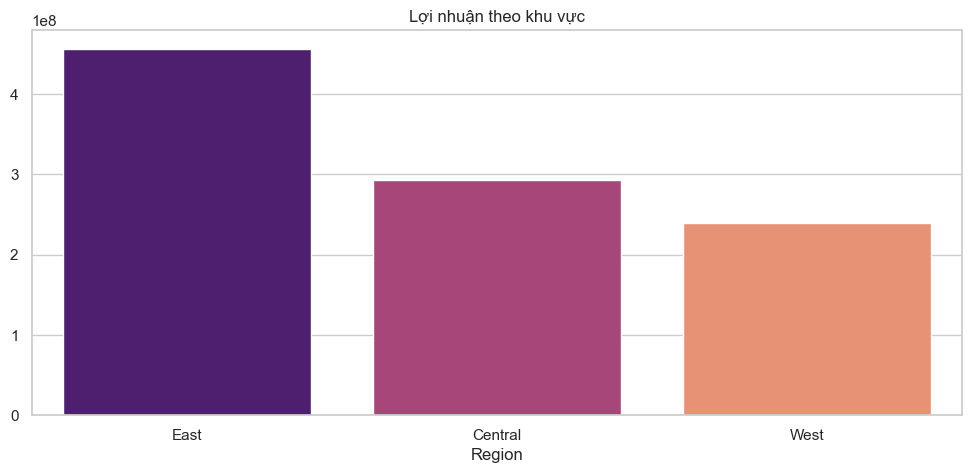

In [27]:
### So sánh lợi nhuận theo khu vực ###
plt.figure(figsize=(12, 5))
region_profit = dfi.groupby('Region')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values, palette="magma")
plt.title("Lợi nhuận theo khu vực")
plt.show()



Có thể thấy tổng lợi nhuận của vùng East cao hơn rất nhiều so với Central và West

**Doanh thu theo ngày trong tuần**

/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


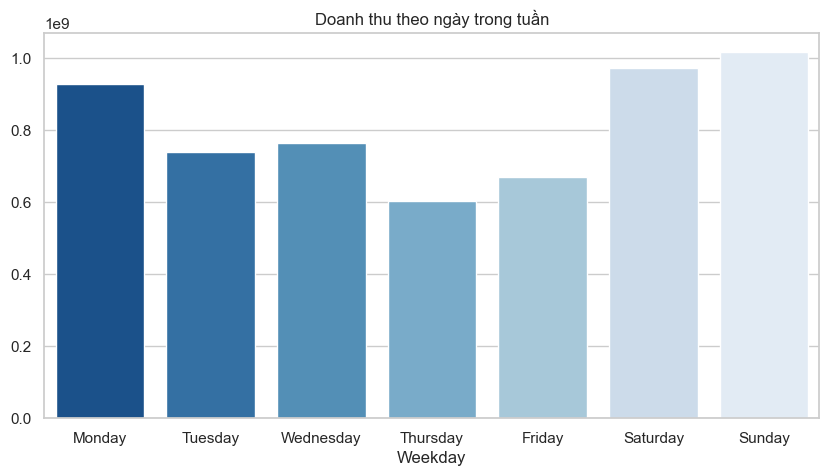

In [28]:
### Biến động doanh thu theo ngày trong tuần ###
plt.figure(figsize=(10, 5))
weekday_sales = dfi.groupby('Weekday')['Revenue'].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="Blues_r")
plt.title("Doanh thu theo ngày trong tuần")
plt.show()


Ngày chủ nhật đang là ngày có tổng doanh thu cao nhất và ngày thứ 5 đang là ngày có tổng doanh thu thấp nhất

**Hiệu suất theo Category**

/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


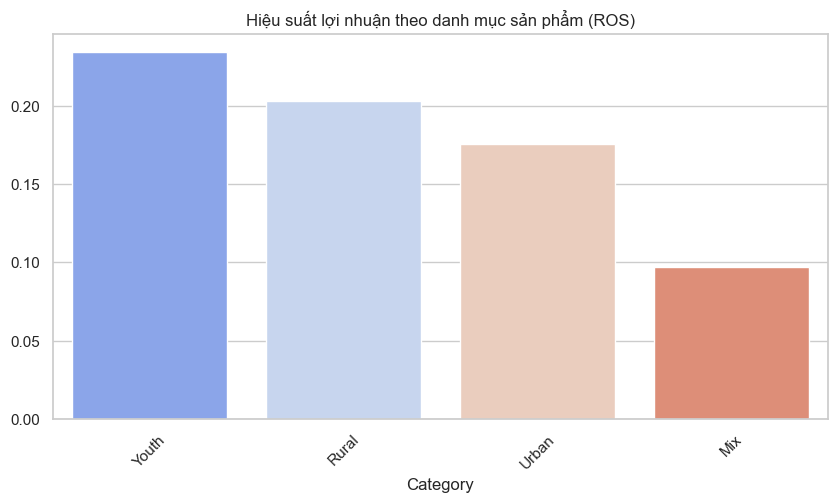

In [29]:
### Phân tích Return on Sales (ROS) theo danh mục sản phẩm ###
plt.figure(figsize=(10, 5))
category_ros = dfi.groupby('Category')['ROS'].mean().sort_values(ascending=False)
sns.barplot(x=category_ros.index, y=category_ros.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Hiệu suất lợi nhuận theo danh mục sản phẩm (ROS)")
plt.show()



Categoty Youth đang cho thấy độ hiệu quả cao nhất khi trung bình ROS đang cao nhất (tức là trung bình tỉ lệ lợi nhuận/doanh thu đang cao nhất)

**Tăng trưởng doanh thu theo năm và tháng**

/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TrungLe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

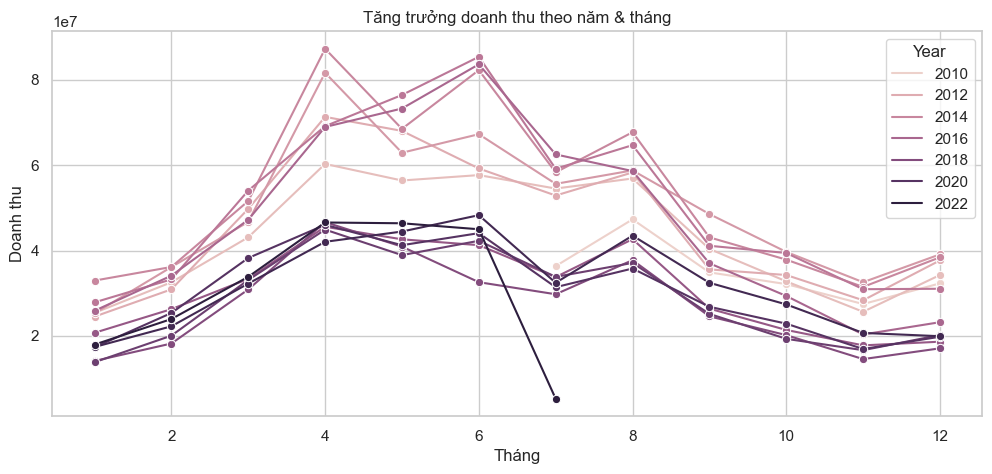

In [31]:
### Tăng trưởng doanh thu theo năm & tháng ###
plt.figure(figsize=(12, 5))
monthly_revenue = dfi.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', hue='Year', marker="o")
plt.title("Tăng trưởng doanh thu theo năm & tháng")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")
plt.show()

Các tháng 4, 6, 8 đang cho thấy cùng xu hướng là đạt đỉnh của doanh thu, do đó cần chú trọng vào yếu tố mùa vụ và phát triển sản phẩm phù hợp theo mốc thời gian này